<a href="https://colab.research.google.com/github/2303A52337/Explainable-AI-Lab-Practical/blob/main/EX_AI_LAB_EXAM_2_2337.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<Figure size 1200x600 with 0 Axes>

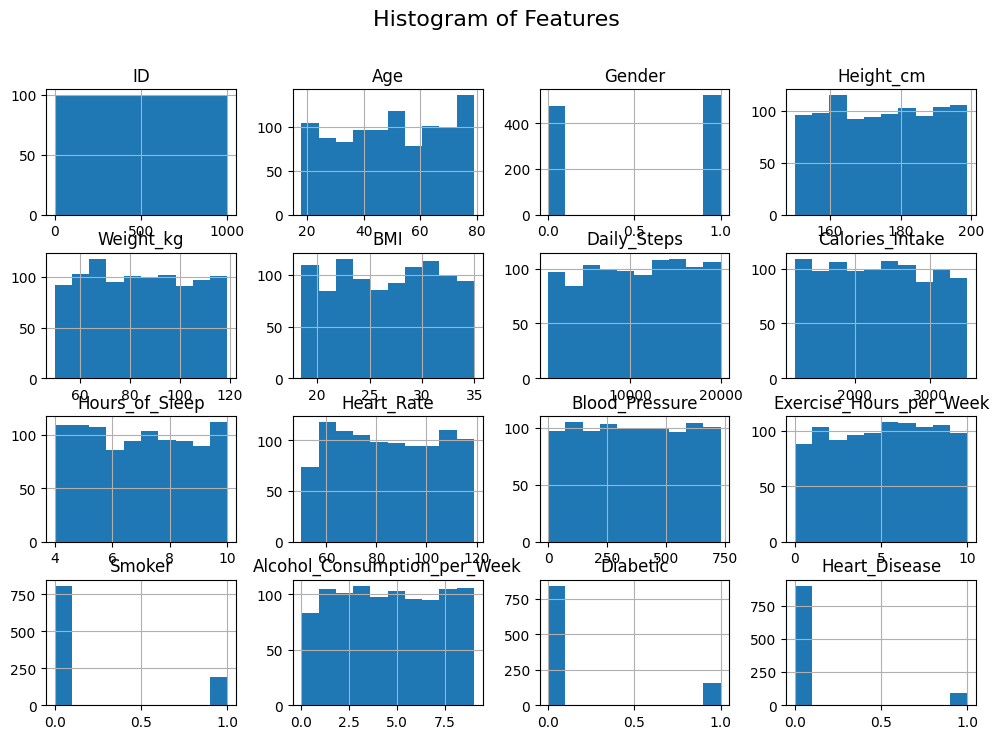

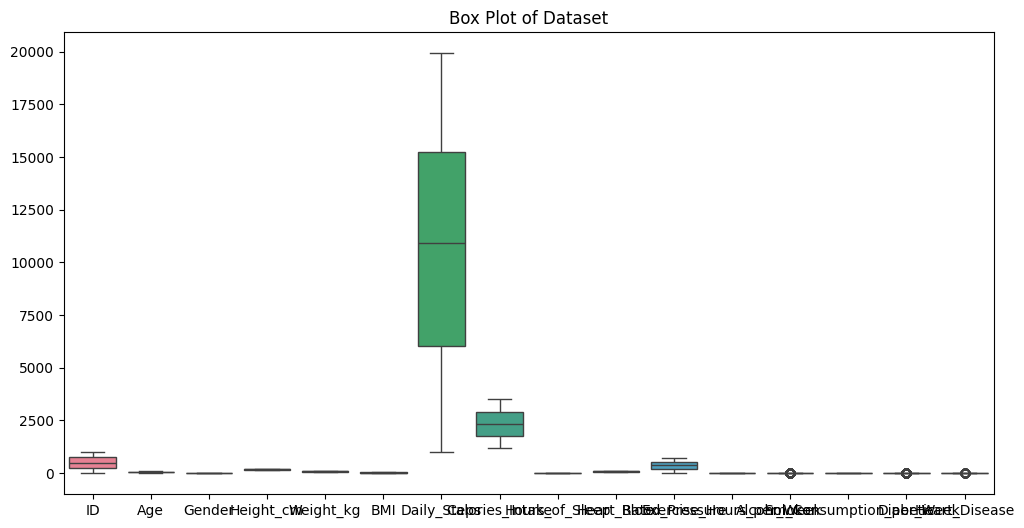

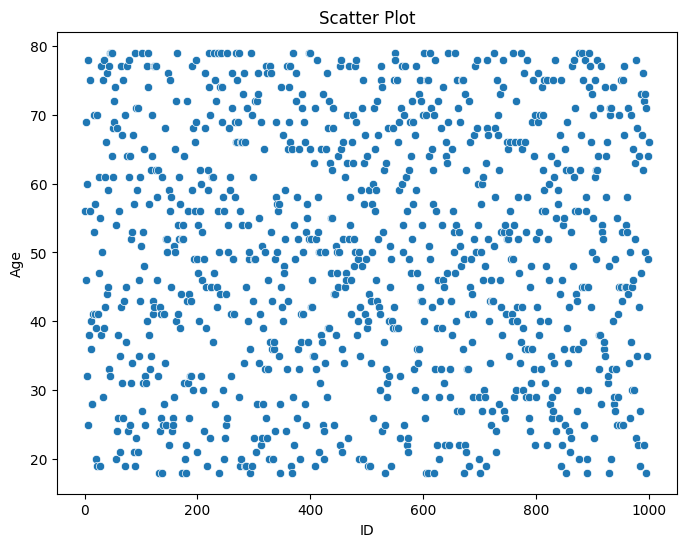

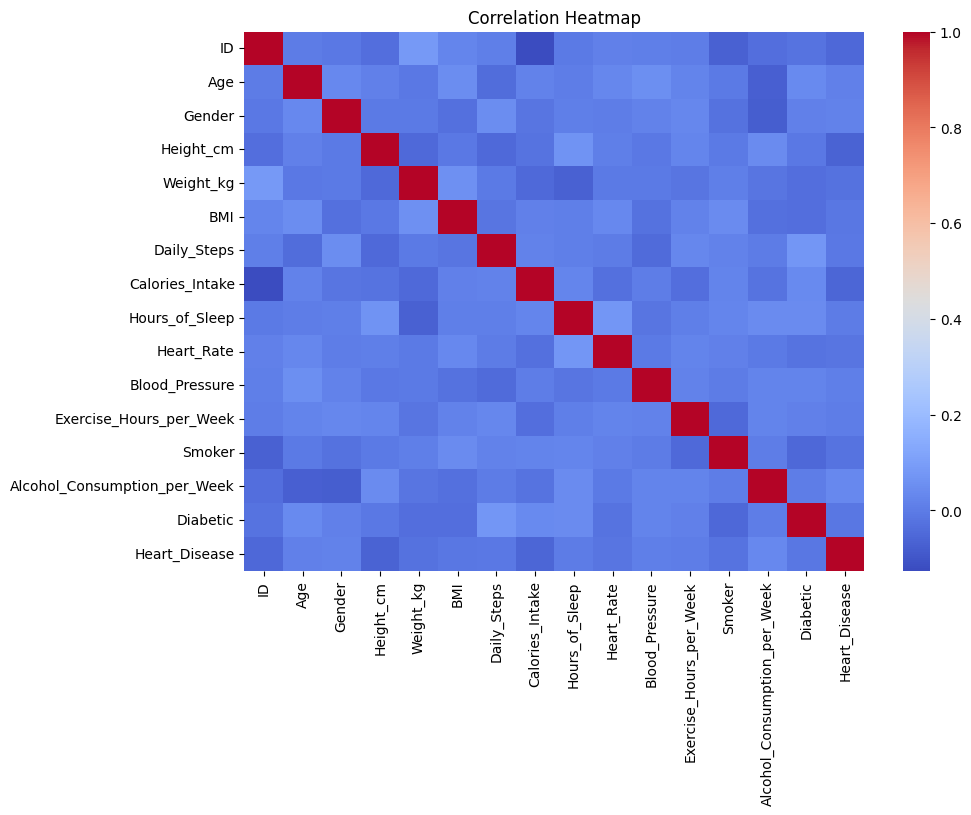

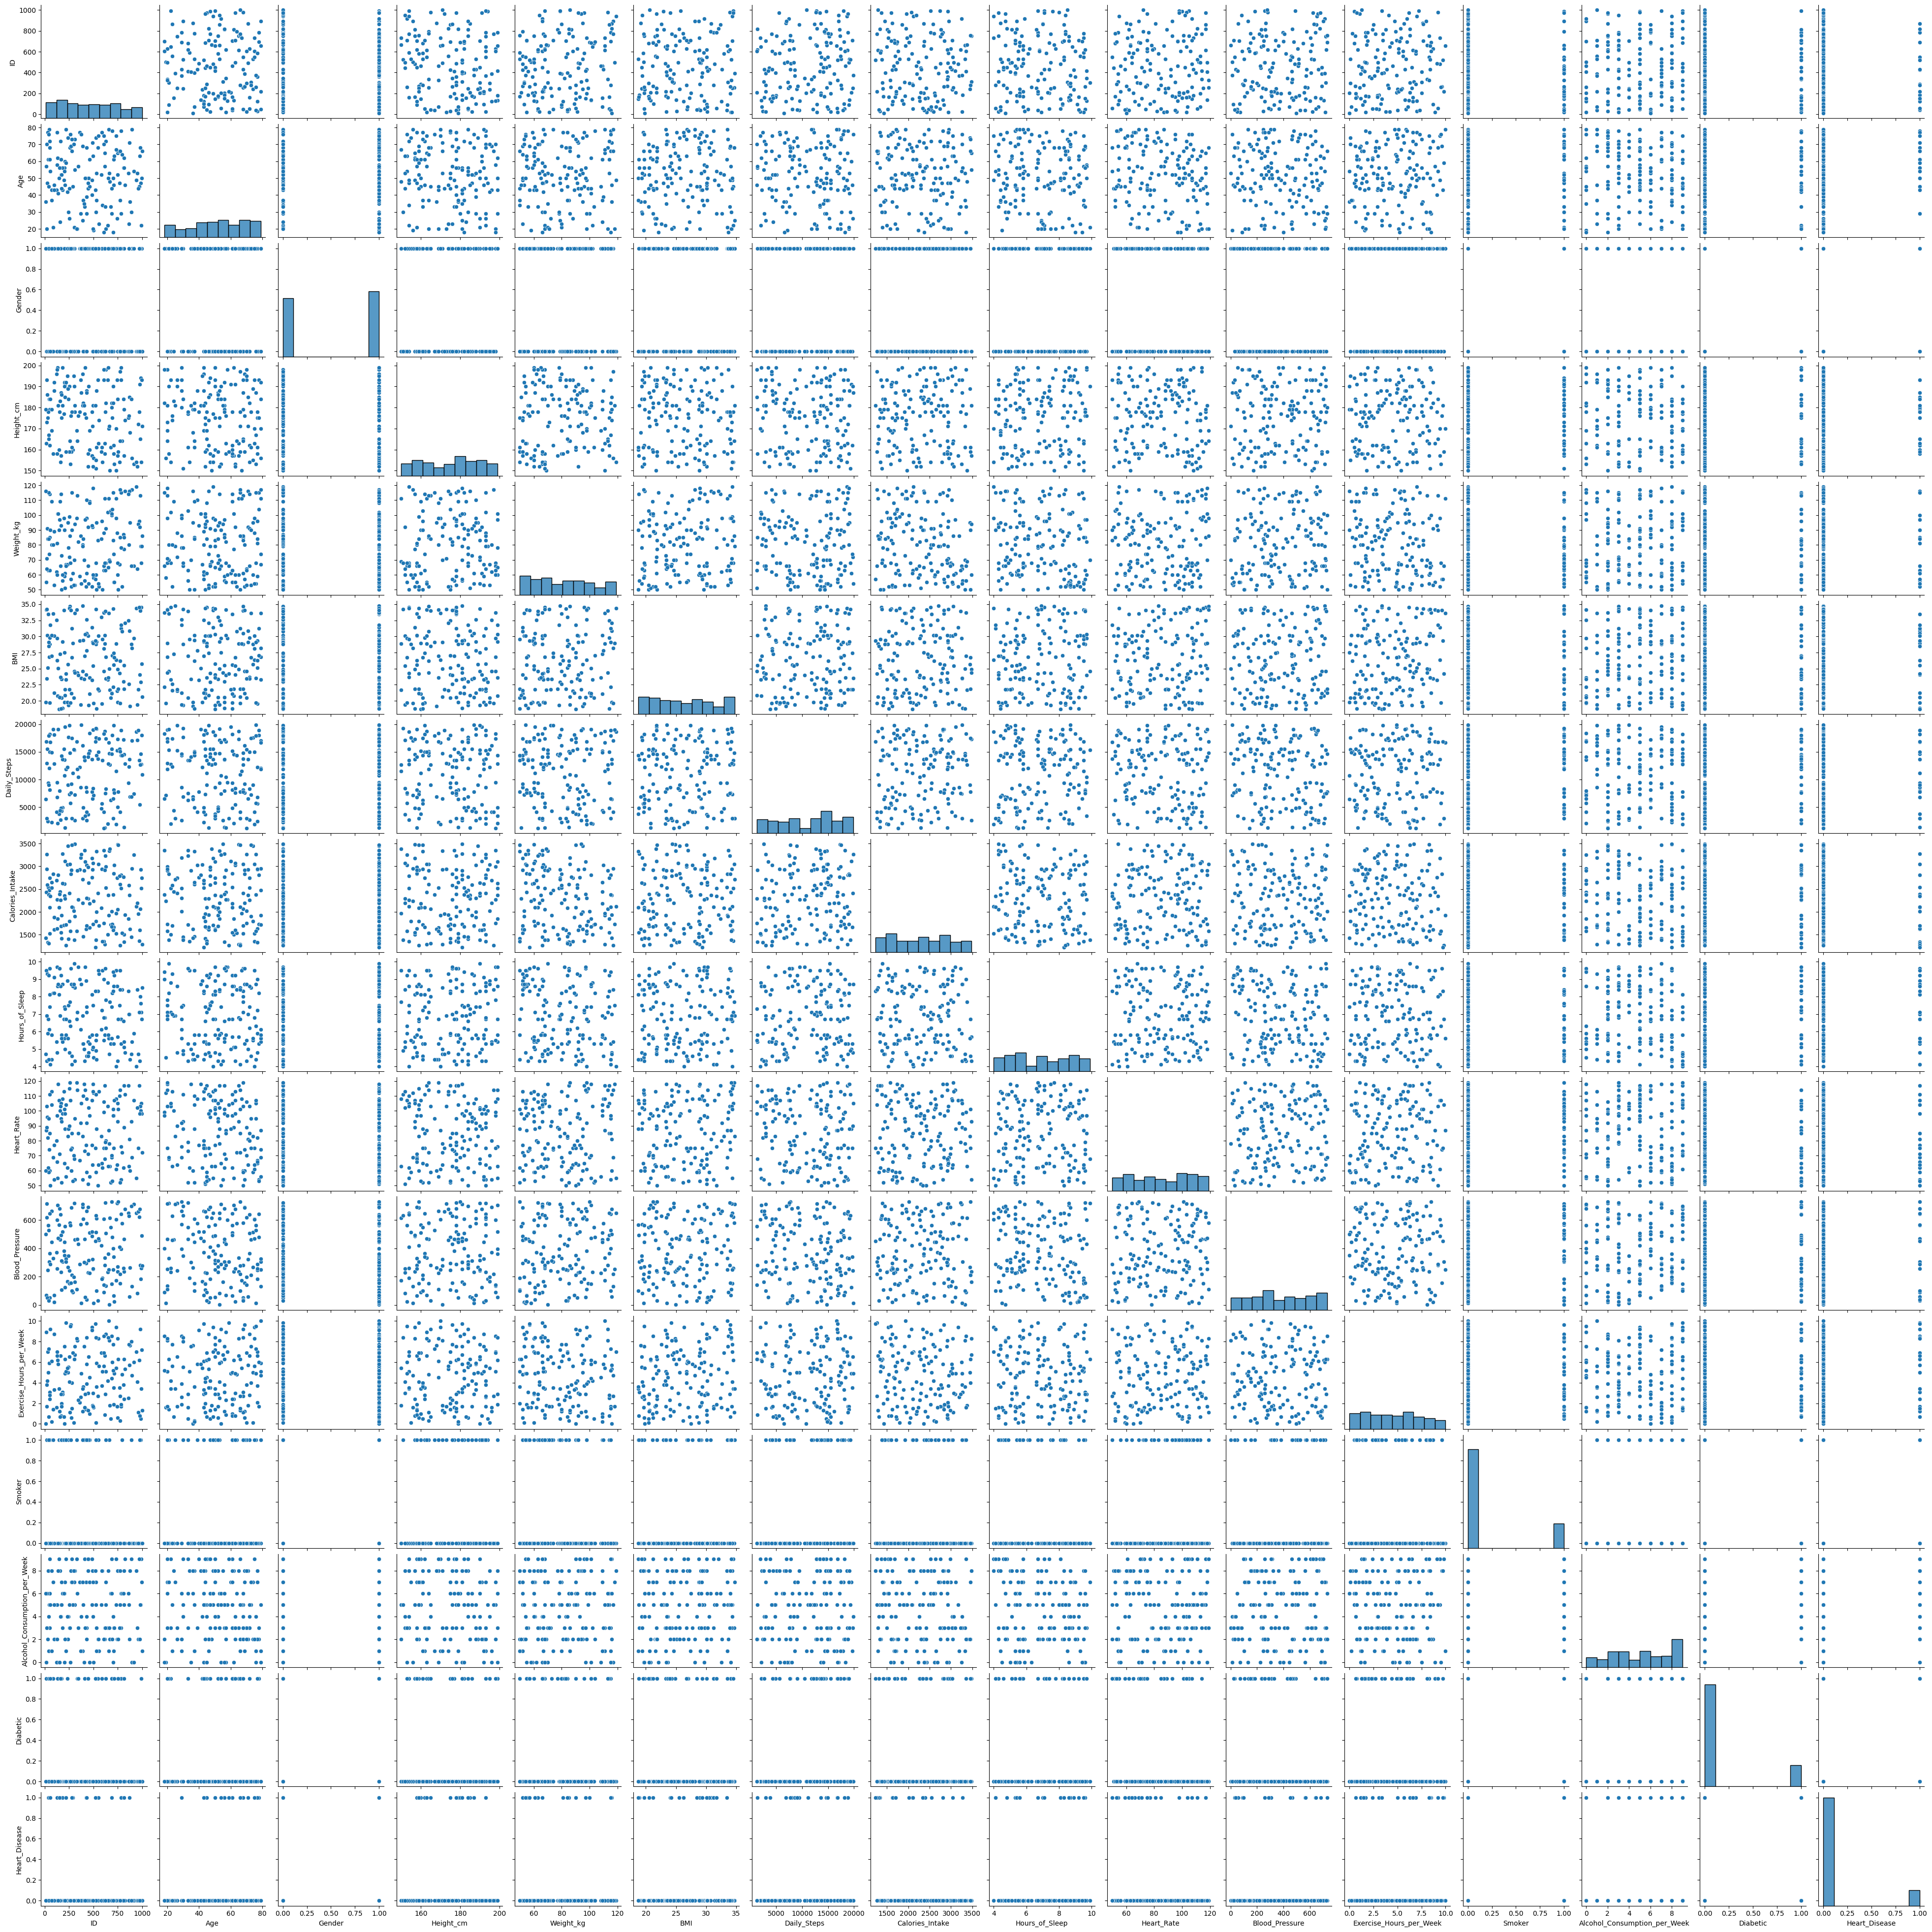


MODEL: Logistic Regression
Accuracy: 0.93
Precision: 0.465
Recall: 0.5
F1 Score: 0.48186528497409326
Confusion Matrix:
 [[186   0]
 [ 14   0]]

MODEL: Decision Tree Classifier
Accuracy: 0.8
Precision: 0.4980392156862745
Recall: 0.4961597542242704
F1 Score: 0.48927477017364657
Confusion Matrix:
 [[158  28]
 [ 12   2]]

MODEL: KNN
Accuracy: 0.915
Precision: 0.46446700507614214
Recall: 0.49193548387096775
F1 Score: 0.47780678851174935
Confusion Matrix:
 [[183   3]
 [ 14   0]]

MODEL: Naive Bayes (Gaussian)
Accuracy: 0.93
Precision: 0.465
Recall: 0.5
F1 Score: 0.48186528497409326
Confusion Matrix:
 [[186   0]
 [ 14   0]]

MODEL: SVM
Accuracy: 0.93
Precision: 0.465
Recall: 0.5
F1 Score: 0.48186528497409326
Confusion Matrix:
 [[186   0]
 [ 14   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [10]:
# ✅ ONE CELL: VISUALIZATIONS + 5 ML MODELS (FULL ASSIGNMENT)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# --------------------------------------------
# LOAD DATA
# --------------------------------------------
df = pd.read_csv("health_activity_data.csv")

# --------------------------------------------
# HANDLE MISSING VALUES
# --------------------------------------------
df = df.fillna(df.mean(numeric_only=True))
df = df.fillna(df.mode().iloc[0])

# --------------------------------------------
# LABEL ENCODE CATEGORICAL FEATURES
# --------------------------------------------
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])

# --------------------------------------------
# BASIC VISUALIZATIONS
# --------------------------------------------

plt.figure(figsize=(12,6))
df.hist(figsize=(12,8))
plt.suptitle("Histogram of Features", fontsize=16)
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.title("Box Plot of Dataset")
plt.show()

plt.figure(figsize=(8,6))
sns.scatterplot(x=df.columns[0], y=df.columns[1], data=df)
plt.title("Scatter Plot")
plt.show()

plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Pairplot (uses only small sample to avoid lag)
sns.pairplot(df.sample(min(150, len(df))))
plt.show()

# --------------------------------------------
# TRAIN / TEST SPLIT
# --------------------------------------------
target = df.columns[-1]
X = df.drop(target, axis=1)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --------------------------------------------
# NORMALIZE
# --------------------------------------------
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# --------------------------------------------
# METRICS FUNCTION
# --------------------------------------------
def show_metrics(model_name, y_true, y_pred):
    print("\n==============================================")
    print("MODEL:", model_name)
    print("==============================================")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred, average='macro'))
    print("Recall:", recall_score(y_true, y_pred, average='macro'))
    print("F1 Score:", f1_score(y_true, y_pred, average='macro'))
    print("Confusion Matrix:\n", confusion_matrix(y_true, y_pred))

# --------------------------------------------
# 5 REQUIRED ML MODELS
# --------------------------------------------
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes (Gaussian)": GaussianNB(),
    "SVM": SVC()
}

# --------------------------------------------
# TRAIN + EVALUATE
# --------------------------------------------
for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    show_metrics(name, y_test, pred)
